# Initial clustering approach

This notebook demonstrates how clustering of feature vectors can be used to help improve posterior inference in basket trials.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSiteWithFeatures, ClusteringData
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF
from pyBasket.common import MODEL_INDEPENDENT, MODEL_HIERARCHICAL, MODEL_BHM, MODEL_CLUSTERING

In [5]:
DEBUG = True

In [6]:
num_burn_in = 1E5
num_posterior_samples = 1E5
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 5E4
    num_posterior_samples = 5E4
    num_chains = 1

### Generate data

Similar set-up to CBHM paper.

In [8]:
K = 6    # the number of groups
p0 = 0.20 # null response rate
p1 = 0.40 # target response rate

true_response_rates = [p0, p0, p1, p1, p1, p1]
enrollment = [10, 10]

n = 100
dim = 8
pvals_map = {
    p0: [1/10] * dim,
    p1: ([0.05] * int(dim/2)) + ([0.15] * int(dim/2))
}

sites = []
for k in range(K):
    true_response_rate = true_response_rates[k]
    pvals = pvals_map[true_response_rate]
    site = TrueResponseSiteWithFeatures(k, true_response_rate, enrollment, n, pvals)
    sites.append(site)

evaluate_interim = [False, False]
analysis_names = [MODEL_CLUSTERING]

In [9]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = True
early_efficacy_stop = False

In [10]:
plot_PCA = True
n_components = 5
plot_distance = True
plot_dendrogram = True
max_d = 70
save_analysis = True

In [11]:
trial = Trial(
    K, p0, p1, sites, evaluate_interim, num_burn_in, num_posterior_samples, analysis_names, 
    futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff, 
    early_futility_stop=early_futility_stop, early_efficacy_stop=early_efficacy_stop, num_chains=num_chains,
    plot_PCA=plot_PCA, n_components=n_components, plot_distance=plot_distance, plot_dendrogram=plot_dendrogram, max_d=max_d,
    save_analysis=save_analysis
)

### Infer responses per basket


########## Stage=0 ##########

Registering Group 0 (OPEN): 3/10 for Analysis clustering

Registering Group 1 (OPEN): 2/10 for Analysis clustering

Registering Group 2 (OPEN): 6/10 for Analysis clustering

Registering Group 3 (OPEN): 5/10 for Analysis clustering

Registering Group 4 (OPEN): 4/10 for Analysis clustering

Registering Group 5 (OPEN): 6/10 for Analysis clustering

Clustering for clustering


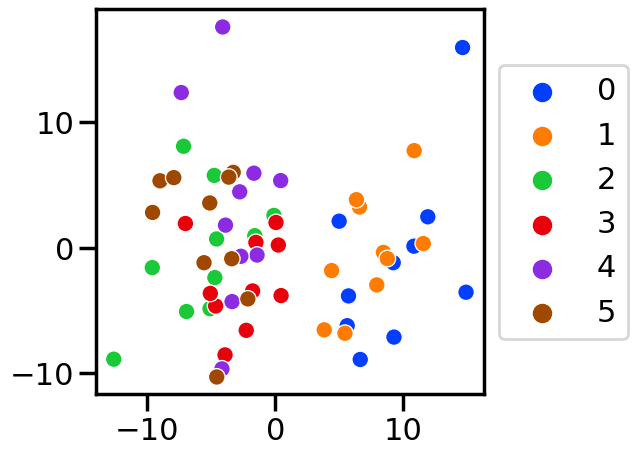

PCA explained variance [0.36966741 0.64936664 0.77182247 0.85969804 0.91646752]


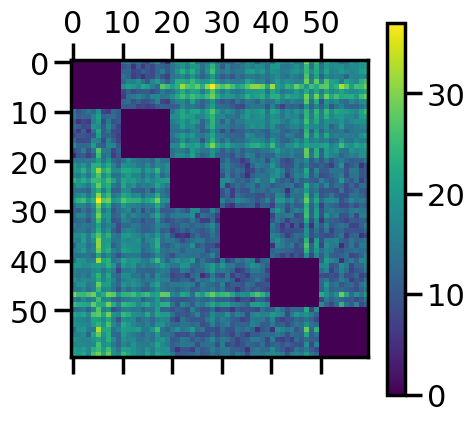

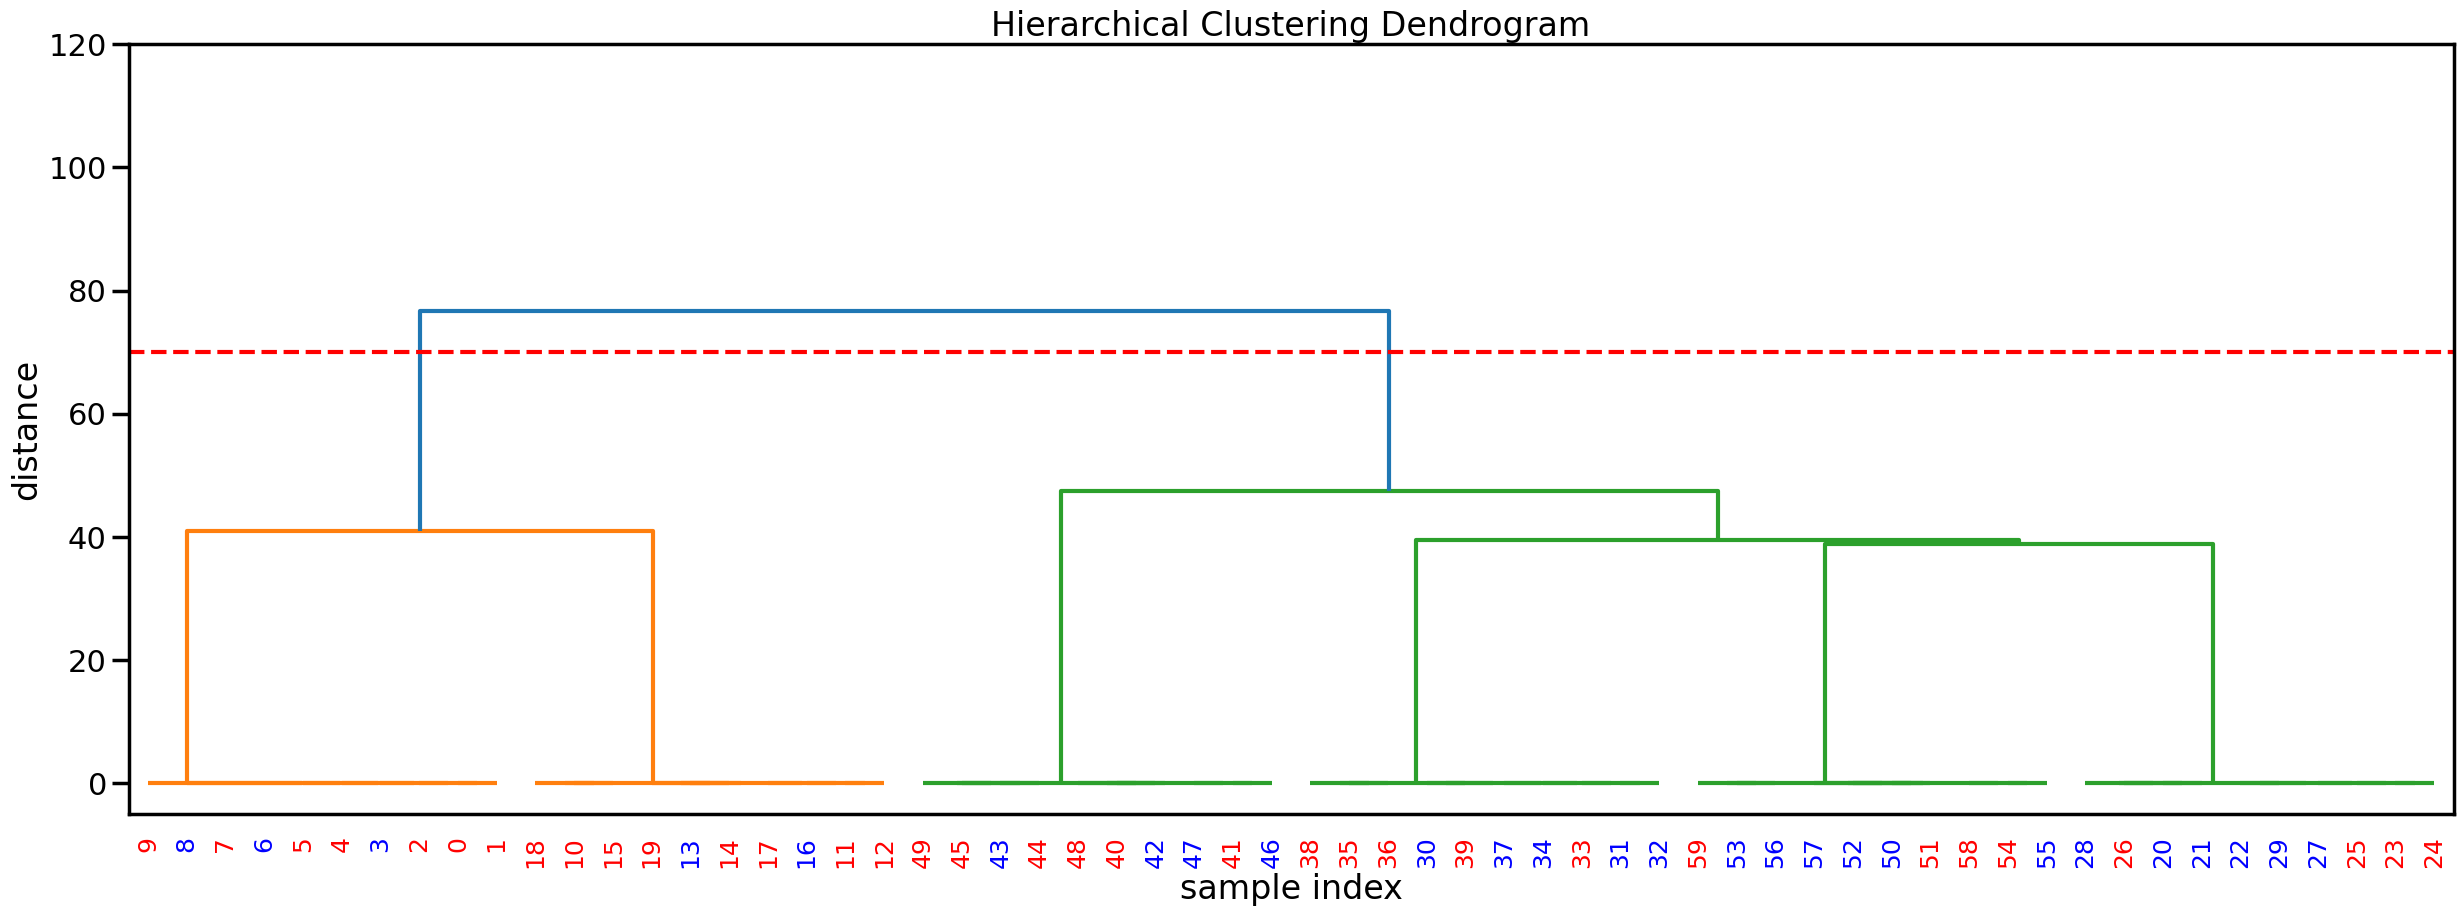

2022-12-08 16:10:19.766 | INFO     | pyBasket.common:save_obj:62 - Saving <class 'pyBasket.env.HierarchicalWithClustering'> to clustering_0.p



########## Stage=1 ##########

Registering Group 0 (OPEN): 6/20 for Analysis clustering

Registering Group 1 (OPEN): 3/20 for Analysis clustering

Registering Group 2 (OPEN): 11/20 for Analysis clustering

Registering Group 3 (OPEN): 8/20 for Analysis clustering

Registering Group 4 (OPEN): 8/20 for Analysis clustering

Registering Group 5 (OPEN): 12/20 for Analysis clustering

Clustering for clustering


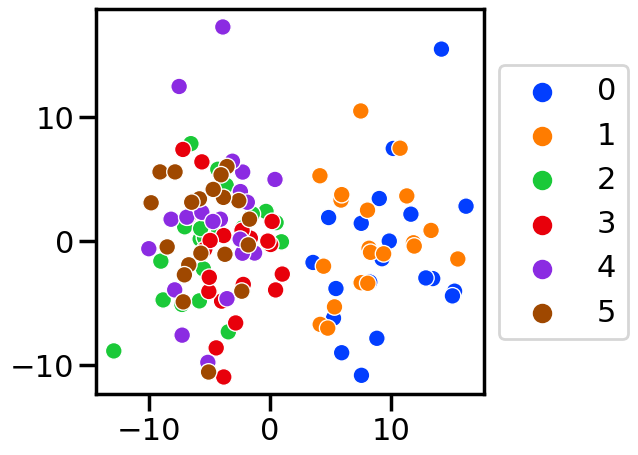

PCA explained variance [0.42263935 0.63468198 0.75261804 0.84927817 0.90732132]


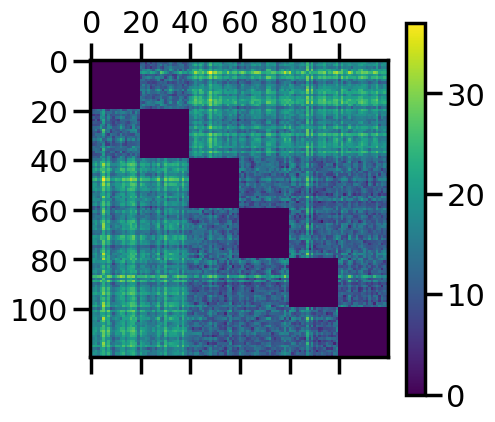

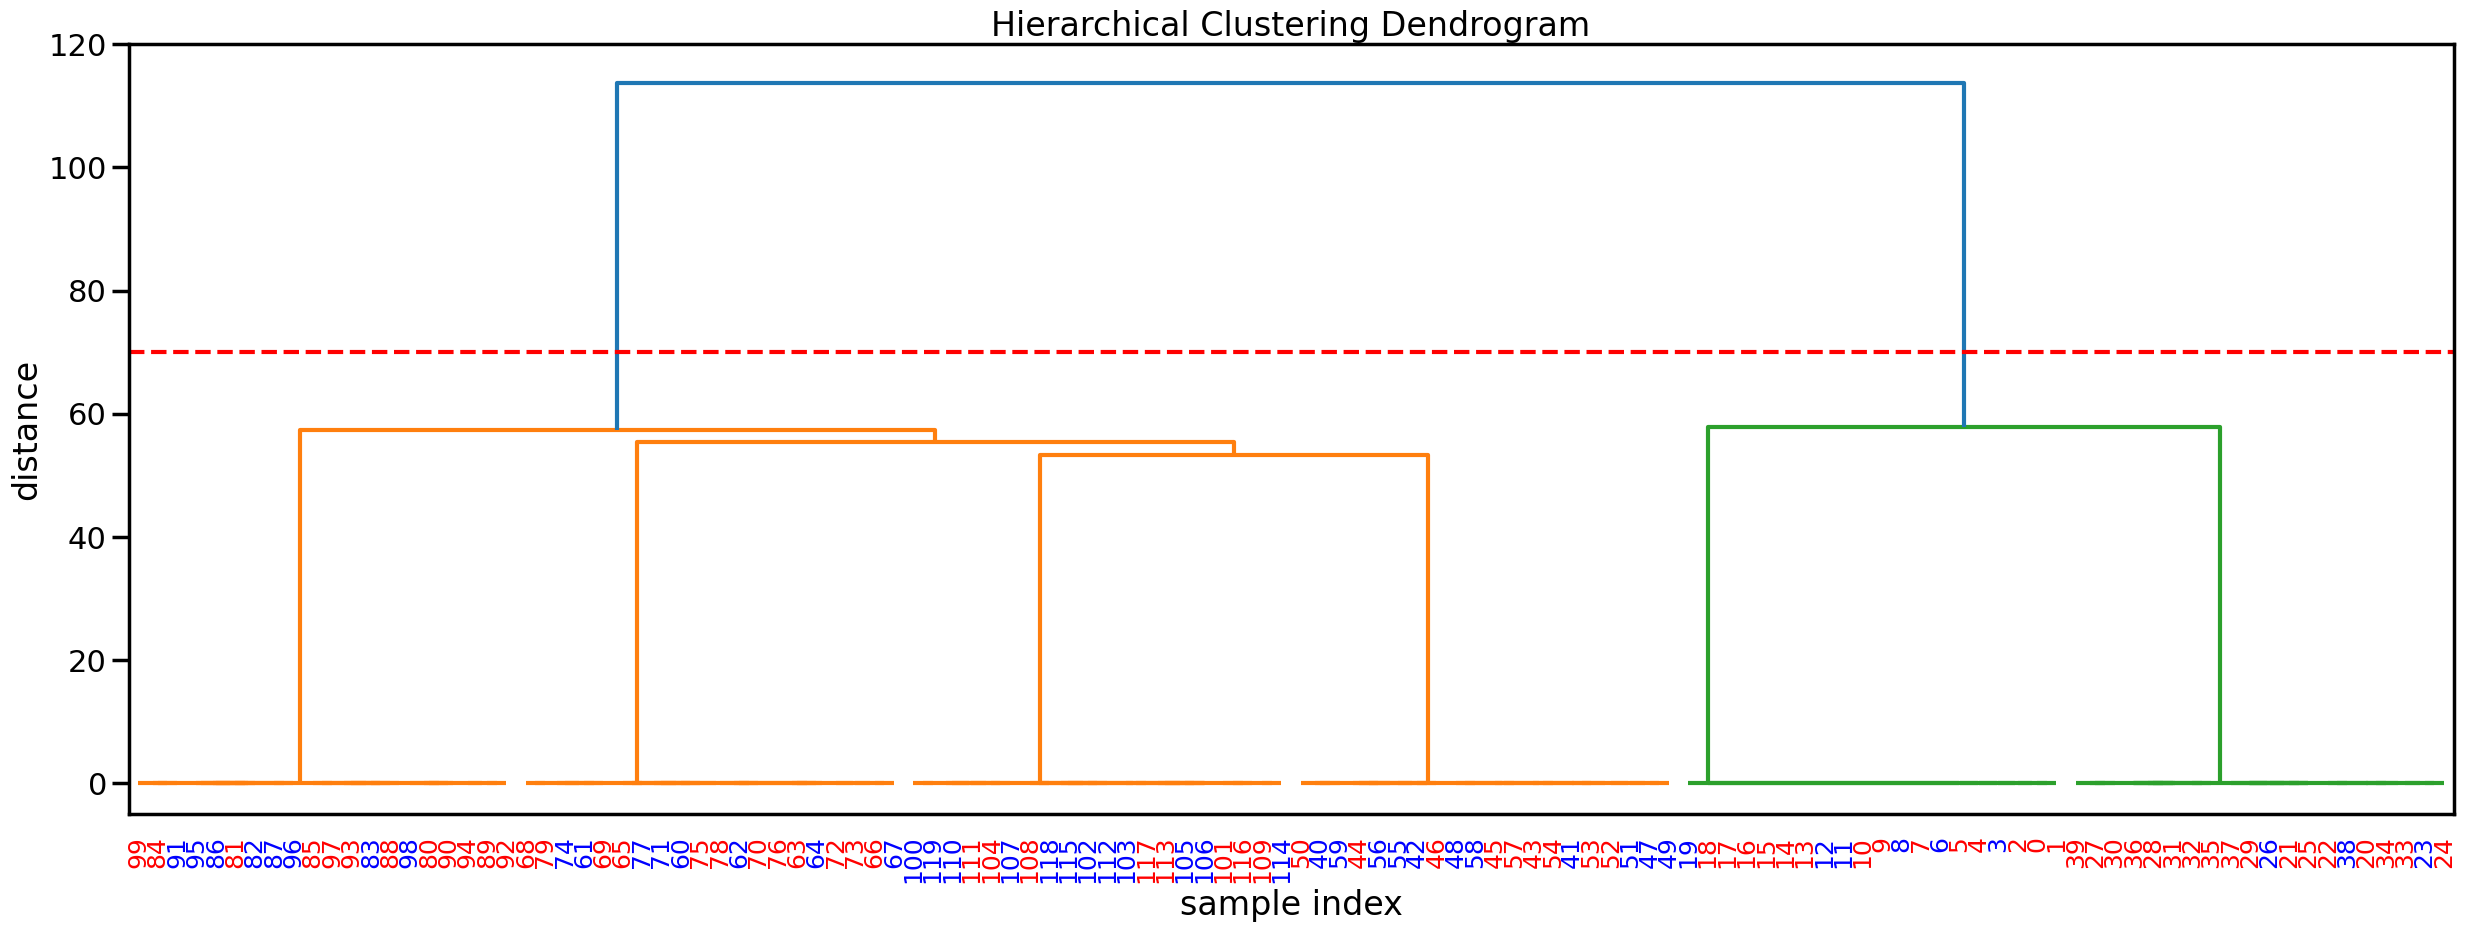

2022-12-08 16:10:20.619 | INFO     | pyBasket.common:save_obj:62 - Saving <class 'pyBasket.env.HierarchicalWithClustering'> to clustering_1.p


In [12]:
done = trial.reset()
while not done:
    done = trial.step()

### Results

In [13]:
analysis_name = analysis_names[0]
analysis_name

'clustering'

In [14]:
trial.visualise_model(analysis_name)

No model to visualise


In [15]:
trial.plot_trace(analysis_name, -1)

No model to visualise


In [16]:
trial.plot_posterior(analysis_name, -1)

No model to visualise


In [17]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,OPEN,6,20
1,OPEN,3,20
2,OPEN,11,20
3,OPEN,8,20
4,OPEN,8,20
5,OPEN,12,20
